In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

spotify_df = pd.read_csv('Spotify-final.csv')
spotify_df = pd.DataFrame(spotify_df)
#delete index, title
del spotify_df['Index']
del spotify_df['Title']
del spotify_df['Length (Duration)']
spotify_df.rename(columns = {'Top Genre':'Genres'}, inplace = True)

# #change year to category
# for col in ['Year','Artist','Genres']:
#     spotify_df[col] = spotify_df[col].astype('category')
# spotify_df


In [23]:
# spotify_df.head()

result = spotify_df.dtypes
print(result)

print(spotify_df['Genres'].unique())

Artist                    object
Genres                    object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object
['pop' 'rock' 'hiphop' 'dance' 'art' 'adult']


In [24]:
#break into test and train 
trainDF, testDF = train_test_split(spotify_df, test_size=0.25, random_state=42)

trainDF.head()
testDF.head()

#separate labels 
#TEST
testLabels = testDF["Genres"]
print(testLabels)

TestDF = testDF.drop(["Genres"], axis=1)
# print(testDF)

### TRAIN----------------------
trainLabels=trainDF["Genres"]
print(trainLabels)

# one-hot encode categorical variables 
trainDF = pd.get_dummies(trainDF)
testDF = pd.get_dummies(testDF)

# trainDF.columns.values

## remove labels
# commenting this out, supervised learning algos require labels in train set 
# TrainDF = TrainDF.drop(["Genres"], axis=1)
#trainlabels, train df, testdf, testlabels 


135     rock
1281    rock
1117    rock
998     rock
808     rock
        ... 
451     rock
584     rock
1602    rock
1100    rock
613     rock
Name: Genres, Length: 404, dtype: object
1286    dance
1549     rock
596      rock
532      rock
812       pop
        ...  
1130      art
1294     rock
860      rock
1459    adult
1126    adult
Name: Genres, Length: 1211, dtype: object


/Users/abbyfremaux/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Frequency')

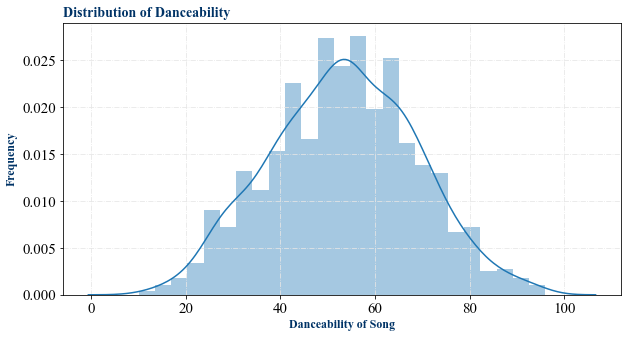

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.9',
      'grid.linestyle':'-.',
      'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)
sns.distplot(spotify_df['Danceability'])
plt.title("Distribution of Danceability", loc='left', fontsize=14,fontweight='bold',color='#003366')
plt.xlabel("Danceability of Song", fontsize=12,fontweight='bold',color='#003366')
plt.ylabel("Frequency", fontsize=12,fontweight='bold',color='#003366')

<AxesSubplot:>

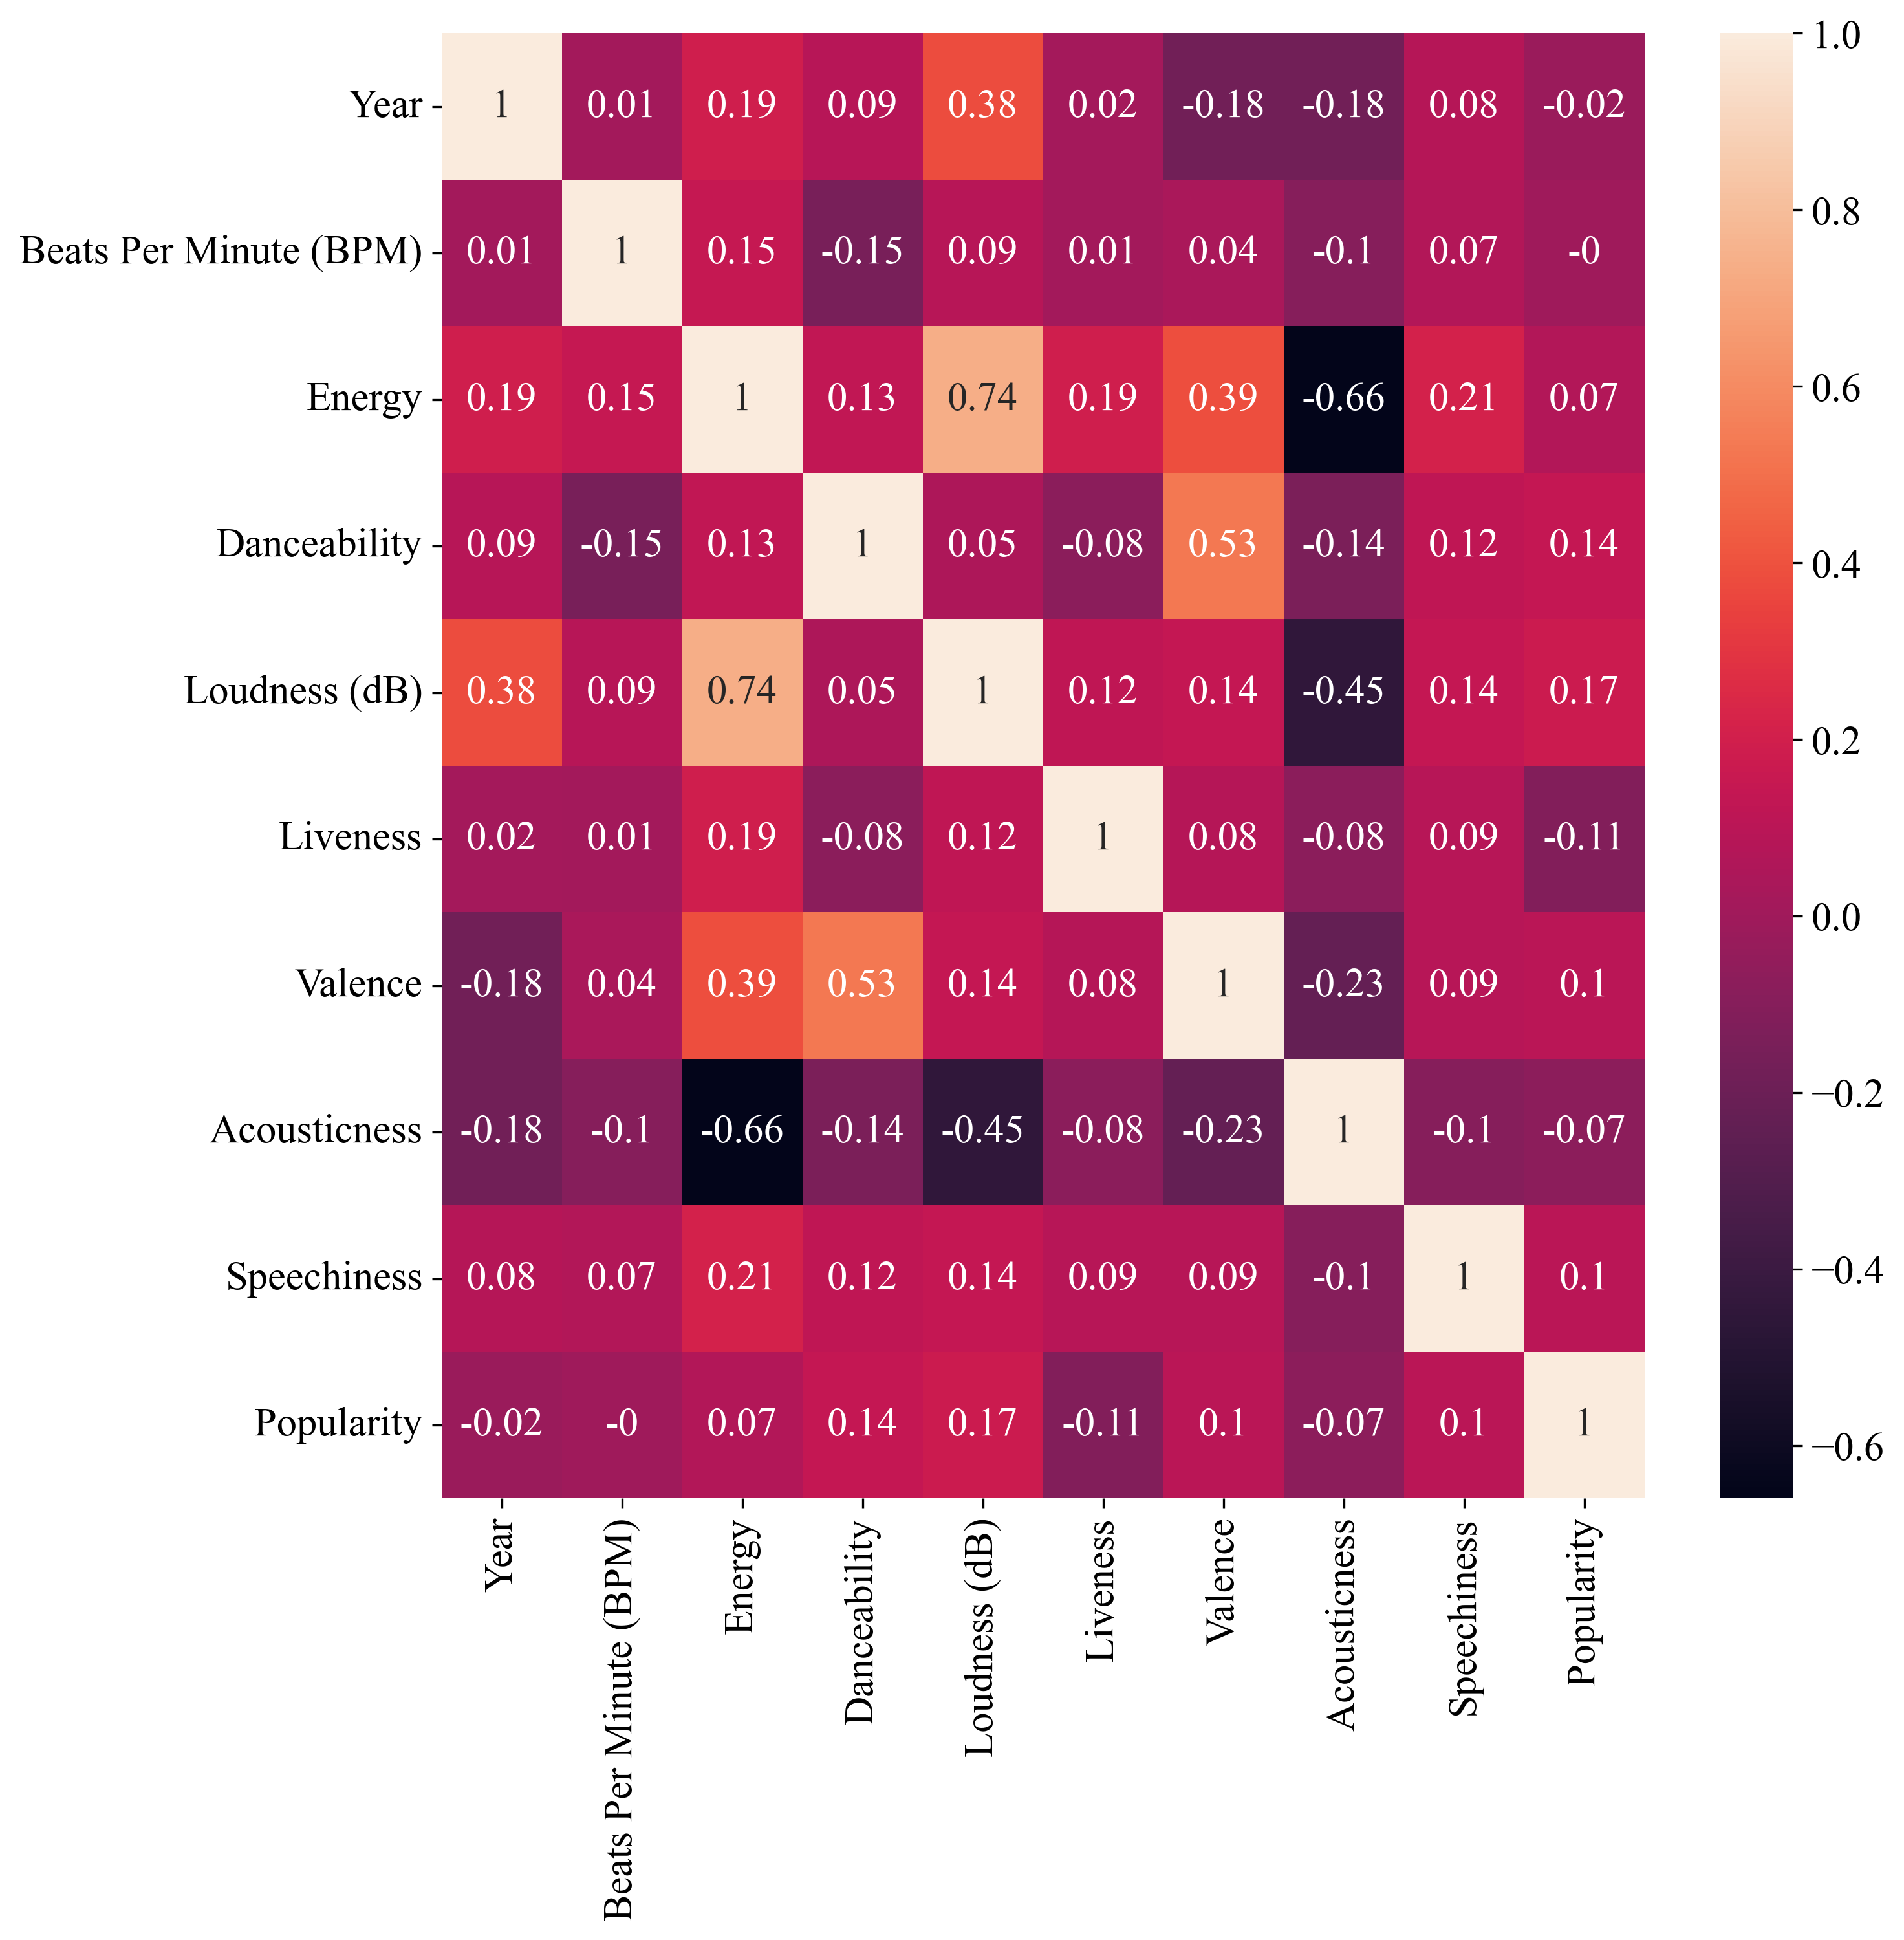

In [27]:
plt.figure(figsize=(10, 10),dpi=300)
correlation_matrix = spotify_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
#plt.savefig('app/static/heatmap_allvar.jpg',dpi=300)

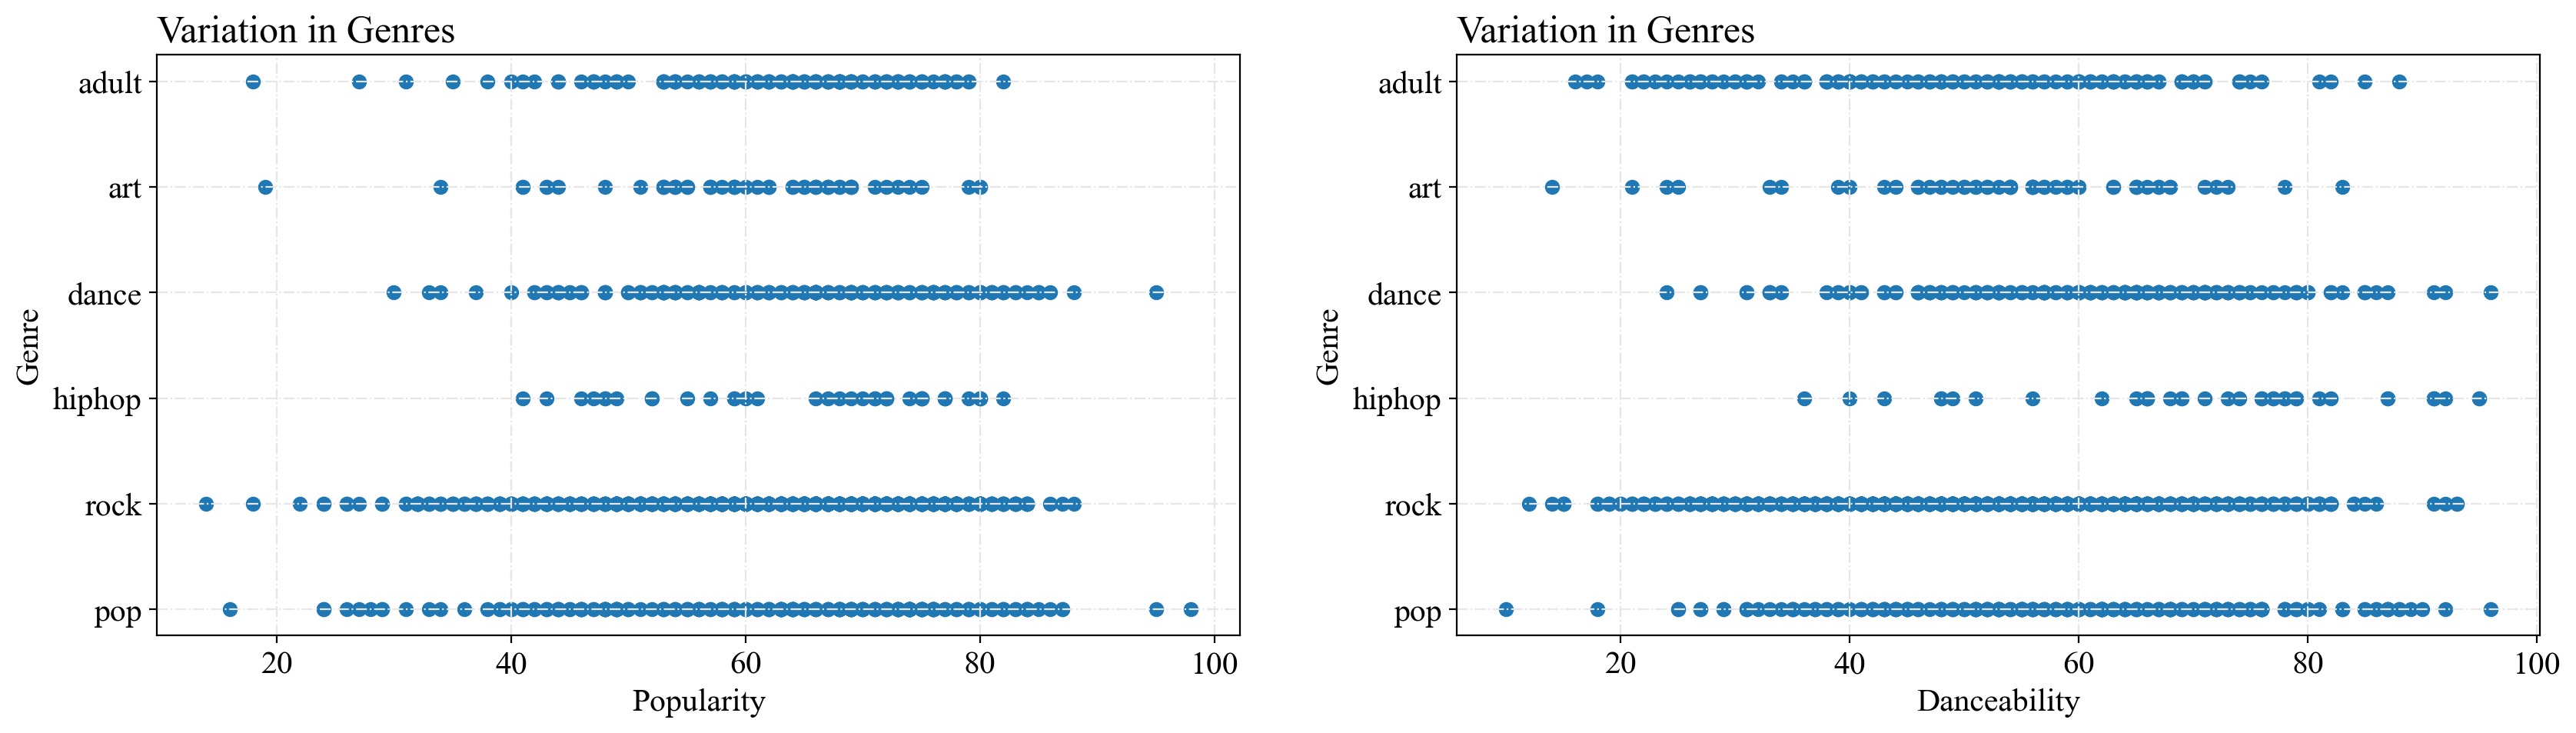

In [26]:
from matplotlib import rcParams

plt.figure(figsize=(20, 5),dpi=200)

features = ['Popularity', 'Danceability']
target = spotify_df['Genres'] 

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = spotify_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in Genres",loc="Left")
    plt.xlabel(col)
    plt.ylabel('Genre')

In [28]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = make_subplots(
rows=1, cols=2
# subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4")
)

fig.add_trace(
    go.Scatter(x=spotify_df["Energy"],y=spotify_df['Danceability'],mode='markers',
    marker=dict(
            color="#003366"),
        line=dict(color="#003366",width=1)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=spotify_df['Popularity'],y=spotify_df['Danceability'],mode='markers',
    marker=dict(
            color="#FF6600"),
        line=dict(color="#FF6600",width=1)),
    row=1, col=2
)

# Update xaxis properties
# fig.update_xaxes(title_text="Lower State Population (%)", row=1, col=1)
# fig.update_xaxes(title_text="Number of Rooms", row=1, col=2)

# # Update yaxis properties
# fig.update_yaxes(title_text="House Prices ($1000)", row=1, col=1)
# fig.update_yaxes(title_text="yaxis 2 title", range=[40, 80], row=1, col=2)
# Update title and height
fig.update_layout(height=600, width=1400, title_text="Variation in Housing Prices")
#output_file="app/static/baseimage.svg"
#fig.write_image(output_file,width=1200,engine="kaleido")
fig.show()

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [30]:
# Get a List of Models as Base Models
def base_models():
  models = dict()
  
  models["GBM"] = GradientBoostingClassifier()
  models["Bagging"] = BaggingClassifier()
  models["Random Forest"] = RandomForestClassifier(n_estimators=200, max_depth=10)
  # # models["Stacking"] = StackingClassifier()
  models["ADA"] = AdaBoostClassifier()
  models["SVM"] = LinearSVC(max_iter=2000)
  models["Decision Tree"] = DecisionTreeClassifier()
  models["Logistic Regression"] = LogisticRegression(max_iter=2000)
  models["K Neighbors"] = KNeighborsClassifier()
  # models["Gaussian NB"] = GaussianNB()

  
  return models

**Cross Validation** 

* 80/20 split on the data which means that about 400 records are in the test data set. This is not a lot of "unseen" data so k-fold cross validation will be used 

* Why Repeated K fold ? --> This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. This mean result is expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error.  (https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/)

In [31]:
# K fold cross validation
from random import shuffle
from sklearn.model_selection import RepeatedKFold

# one hot encode spotify data for use with cv
spotify_data_ohe = pd.get_dummies(spotify_df)
genre_target = spotify_df['Genres']

# Function to evaluate the list of models
def eval_models(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = -cross_val_score(model, spotify_data_ohe, genre_target, 
                          # njobs = -1 using all processors (parallelizing)
                            scoring='accuracy', cv=cv, n_jobs= -1,
                            error_score='raise')
  return scores


In [ ]:
# get the models to evaluate
models = base_models()
# evaluate the models and store results
results, names = list(), list() 

for name, model in models.items():
  scores = eval_models(model)
  # print(scores, "\n")
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

Negative accuracy??

* Generally that means that the model you have fit is worse than the null hypothesis, that a straight line with slope of 0 is a better fit than the model you created.
* or datas 2 small but the example in the stack overflow was able to fix it by increasing data to 100 rows so idk if thats our problem 

In [ ]:
classmod = pd.DataFrame(np.transpose(results), columns = ["GBM","Bagging","Random Forest","ADA","SVM","Decision Tree","LR","KN"])
classmod = pd.melt(classmod.reset_index(), id_vars='index',value_vars=["GBM","Bagging","Random Forest","ADA","SVM","Decision Tree","LR","KN"])
fig = px.box(classmod, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "Accuracy"
        },title="Model Performance")
# fig.write_image("app/static/Boxplot_candidate.jpeg",engine="kaleido",format="png", width=1600, height=700, scale=0.75)
fig.show()

In [ ]:
from random import random
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor, StackingRegressor
# get a stacking ensemble of models
def get_stacking():
	# define the base models
  level0 = list()
  level0.append(('RF', RandomForestClassifier()))
  level0.append(('SVM', LinearSVC(max_iter=2000)))
  level0.append(('LR', LogisticRegression(max_iter=2000)))
  level0.append(('KN', KNeighborsClassifier()))
	# define meta learner model
  level1 = RandomForestClassifier(n_estimators=200, max_depth=10)
	# define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
  return model

In [ ]:
def base_models():
  models = dict()
  models["Random Forest"] = RandomForestClassifier()
  models["SVM"] = LinearSVC(max_iter=2000)
  models["LR"] = LogisticRegression(max_iter=2000)
  models["KN"] = KNeighborsClassifier()
  models["Stacked Model"] = get_stacking()
  return models

# get the models to evaluate
models = base_models()
# evaluate the models and store results
results, names = list(), list() 

for name, model in models.items():
  scores = eval_models(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

In [ ]:
len(results)

In [ ]:
classmod = pd.DataFrame(np.transpose(results), columns = ["ADA","SVM","LR","KN","Stacked Model"])
classmod = pd.melt(classmod.reset_index(), id_vars='index',value_vars=["ADA","SVM","LR","KN","Stacked Model"])
fig = px.box(classmod, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "Accuracy"
        },title="Model Performance")
# fig.write_image("app/static/Boxplot_candidate.jpeg",engine="kaleido",format="png", width=1600, height=700, scale=0.75)
fig.show()

In [ ]:
# confusion matrix to evaluate accuracy from hw 1 code 
spotify_df.Genres.value_counts().plot(kind='bar', figsize=(14,8))